<a href="https://colab.research.google.com/github/WojciechTyczynski/Autoencoders-for-image-quality-improvement-with-OMHU/blob/main/DL_final_Project_CAE_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
transform = transforms.Compose(
        [transforms.ToTensor(), ])

# Load dataset
batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/content/drive/MyDrive/deep_learning', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

used_categories = range(len(classes))

train_data_iter = iter(trainloader)
test_data_iter = iter(testloader)
print('used classes:', classes)

Files already downloaded and verified
Files already downloaded and verified
used classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
print("# Training data")
print("Number of points:", len(trainset))
x, y = next(iter(trainloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(trainset.targets)))


print("\n# Test data")
print("Number of points:", len(testset))
x, y = next(iter(testloader))
print("Batch dimension [B x C x H x W]:", x.shape)
print("Number of distinct labels:", len(set(testset.targets)))

# Training data
Number of points: 50000
Batch dimension [B x C x H x W]: torch.Size([16, 3, 32, 32])
Number of distinct labels: 10

# Test data
Number of points: 10000
Batch dimension [B x C x H x W]: torch.Size([16, 3, 32, 32])
Number of distinct labels: 10


 bird   cat  frog   cat


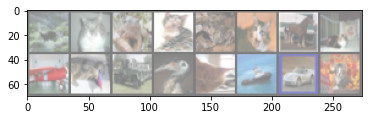

In [ ]:
# Run this cell multiple time to see more samples

def imshow(img):
    """ show an image """
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
images, labels = train_data_iter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
      super(ConvAutoencoder, self).__init__()

      #Encoder
      self.conv1 = nn.Conv2d(3, 12, 4, stride=2, padding=1)
      self.conv2 = nn.Conv2d(12, 24, 4, stride=2, padding=1)
      self.conv3 = nn.Conv2d(24, 48, 4, stride=2, padding=1)

      #Decoder
      self.t_conv1 = nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1)
      self.t_conv2 = nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1)
      self.t_conv3 = nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1)
     

  def forward(self, x):
      #print(x.size())
      x = F.relu(self.conv1(x))
      #print(x.size())
      x = F.relu(self.conv2(x))
      #print(x.size())
      x = F.relu(self.conv3(x))
      #print(x.size())
      x = F.relu(self.t_conv1(x))
      #print(x.size())
      x = F.relu(self.t_conv2(x))
      #print(x.size())
      x = F.sigmoid(self.t_conv3(x))
      #print(x.size())

      return x
  
#Instantiate the model
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv1): ConvTranspose2d(48, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv2): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv3): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)


In [ ]:
#Loss function
# criterion = nn.BCELoss()
criterion = nn.MSELoss()
#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)
model.to(device)

cuda:0


ConvAutoencoder(
  (conv1): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(24, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv1): ConvTranspose2d(48, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv2): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (t_conv3): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)

In [ ]:
#Epochs
n_epochs = 100

train_loss_all = []
test_loss_all = []

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0
    test_loss = 0.0

    #Training
    for data in trainloader:
        images, _ = data
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
  

    with torch.no_grad():
        
        for data in testloader:

            test_images, _ = data
            test_images = test_images.to(device)
            output_test = model(test_images)
           

            # gather data for the validation step
            test_loss += (criterion(output_test, test_images).item()*test_images.size(0))
        
        
    train_loss = train_loss/len(trainloader)
    test_loss = test_loss/len(testloader)

    train_loss_all.append(train_loss)
    test_loss_all.append(test_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}.  Test Loss: {:.6f}'.format(epoch, train_loss, test_loss))

if not os.path.exists('./weights'):
    os.mkdir('./weights')
torch.save(model.state_dict(), "./weights/autoencoder.pkl")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 1 	Training Loss: 0.163788.  Test Loss: 0.091276
Epoch: 2 	Training Loss: 0.077243.  Test Loss: 0.065995
Epoch: 3 	Training Loss: 0.058110.  Test Loss: 0.050177
Epoch: 4 	Training Loss: 0.048528.  Test Loss: 0.043321
Epoch: 5 	Training Loss: 0.042745.  Test Loss: 0.039376
Epoch: 6 	Training Loss: 0.038442.  Test Loss: 0.035646
Epoch: 7 	Training Loss: 0.034090.  Test Loss: 0.032133
Epoch: 8 	Training Loss: 0.031179.  Test Loss: 0.029630
Epoch: 9 	Training Loss: 0.028768.  Test Loss: 0.026848
Epoch: 10 	Training Loss: 0.027080.  Test Loss: 0.026709
Epoch: 11 	Training Loss: 0.025724.  Test Loss: 0.025888
Epoch: 12 	Training Loss: 0.024596.  Test Loss: 0.023927
Epoch: 13 	Training Loss: 0.023521.  Test Loss: 0.023151
Epoch: 14 	Training Loss: 0.022542.  Test Loss: 0.021515
Epoch: 15 	Training Loss: 0.021867.  Test Loss: 0.020526
Epoch: 16 	Training Loss: 0.021361.  Test Loss: 0.022113
Epoch: 17 	Training Loss: 0.021027.  Test Loss: 0.020414
Epoch: 18 	Training Loss: 0.020704.  Tes

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6752a86b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch: 35 	Training Loss: 0.016932.  Test Loss: 0.017026


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6752a86b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6752a86b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch: 36 	Training Loss: 0.016843.  Test Loss: 0.016388


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6752a86b00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6752a86b00>
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch: 37 	Training Loss: 0.016791.  Test Loss: 0.016567
Epoch: 38 	Training Loss: 0.016733.  Test Loss: 0.017533
Epoch: 39 	Training Loss: 0.016664.  Test Loss: 0.016212
Epoch: 40 	Training Loss: 0.016666.  Test Loss: 0.017042
Epoch: 41 	Training Loss: 0.016609.  Test Loss: 0.016079
Epoch: 42 	Training Loss: 0.016549.  Test Loss: 0.017375
Epoch: 43 	Training Loss: 0.016507.  Test Loss: 0.016616
Epoch: 44 	Training Loss: 0.016476.  Test Loss: 0.016786
Epoch: 45 	Training Loss: 0.016416.  Test Loss: 0.015784
Epoch: 46 	Training Loss: 0.016401.  Test Loss: 0.016108
Epoch: 47 	Training Loss: 0.016307.  Test Loss: 0.015983
Epoch: 48 	Training Loss: 0.016242.  Test Loss: 0.015697
Epoch: 49 	Training Loss: 0.016175.  Test Loss: 0.015530
Epoch: 50 	Training Loss: 0.016093.  Test Loss: 0.016159
Epoch: 51 	Training Loss: 0.016035.  Test Loss: 0.015856
Epoch: 52 	Training Loss: 0.015967.  Test Loss: 0.015517
Epoch: 53 	Training Loss: 0.015881.  Test Loss: 0.015584
Epoch: 54 	Training Loss: 0.015

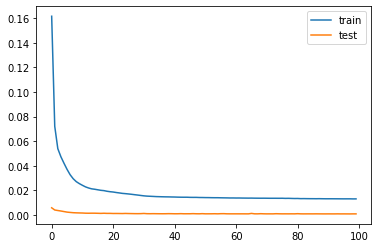

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
errors = {'train' : train_loss_all, 'test' : test_loss_all}
df_errors = pd.DataFrame(data = errors)

errors = df_errors

plt.plot(errors.index.values.tolist(), errors['train'], label = 'train')
plt.plot(errors.index.values.tolist(), errors['test'], label = 'test')
plt.legend()
plt.show()

plt.savefig('errors_base.jpg')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Original Images


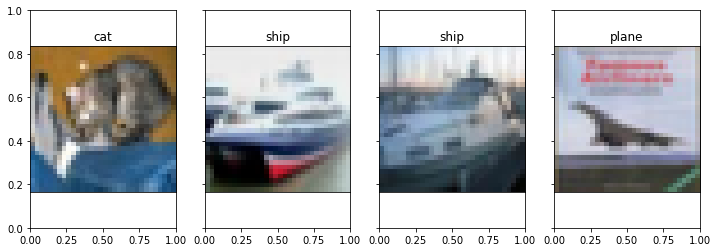

Reconstructed Images


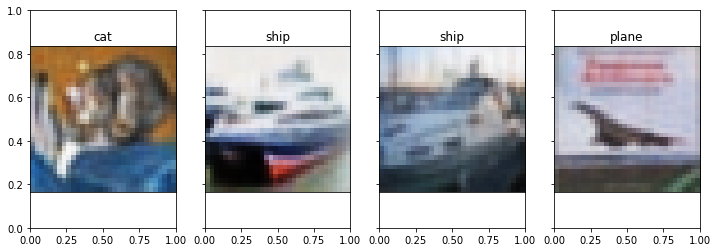

In [ ]:
#Batch of test images
dataiter = iter(testloader)
images, labels = dataiter.next()

#Sample outputs

output = model(images.to(device))
# images = images.numpy()

output = output.view(batch_size, 3, 32, 32)
output = output.to('cpu')
# output = output.detach().numpy()

# GETTING ONLY THE FIRST 4 IMAGES (batch size has been changed to 20)
images = images[0:4]
output = output[0:4]

# NEEDED JUST TO MAKE THE IMAGE A BIT MORE CLEAR, MORE VIVID (interesting for lighting problems)
transform = transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))

#Original Images
print("Original Images")
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(4):
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(transform.forward(images[idx]))
    ax.set_title(classes[labels[idx]])
plt.show()

#Reconstructed Images
print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(4):
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(transform.forward(output[idx].detach()))
    ax.set_title(classes[labels[idx]])
plt.show() 